# Análisis de los Datos del Corán

Este notebook contiene un análisis exploratorio de los datos del proyecto, incluyendo estadísticas descriptivas y visualizaciones para el Corán en árabe e inglés necesarias para la primera entrega del proyecto.

Libererías necesarias.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import wordpunct_tokenize

Empecemos:

In [75]:
ar_q = pd.read_csv("../data/cleaned_data/cleaned_arab_quran.txt", 
                    sep="|", 
                    names=["Capítulo", "Versículo", "Texto"],
                    engine="python",
                    header=None)
ar_q["Capítulo"] = pd.to_numeric(ar_q["Capítulo"], errors="coerce")
ar_q.head()

,Capítulo,Versículo,Texto
0,1.0,1.0,بسم الله الرحمن الرحيم
1,1.0,2.0,الحمد لله رب العالمين
2,1.0,3.0,الرحمن الرحيم
3,1.0,4.0,مالك يوم الدين
4,1.0,5.0,اياك نعبد واياك نستعين


Estadísticas básicas

In [76]:
# Simplemente para ver el número de versos sin tener que eliminar los derechos de autor del dataset original
n_versos = len(ar_q["Texto"])
print(f"Número de versos antes de limpiar: {n_versos}")


ar_q = ar_q.dropna(subset=['Texto'])
ar_q = ar_q[ar_q['Texto'].str.strip() != '']

n_versos = len(ar_q["Texto"])
print(f"Número de versos después de limpiar: {n_versos}")

Número de versos antes de limpiar: 6264
Número de versos después de limpiar: 6236


In [77]:
n_capitulos = ar_q["Capítulo"].nunique()

print(f"Número de versos del Corán: {n_versos}.")
print(f"Número de capítulos del Corán: {n_capitulos}.")

ar_q["Número de palabras del verso"] = ar_q["Texto"].str.split().apply(lambda x: len(x) if isinstance(x, list) else 0)

n_palabras = ar_q["Número de palabras del verso"].sum()
promedio_palabras = ar_q["Número de palabras del verso"].mean()

print(f"Número total de palabras: {n_palabras}.")
print(f"Número promedio de palabras por verso: {round(promedio_palabras, 0)}.")

Número de versos del Corán: 6236.
Número de capítulos del Corán: 114.
Número total de palabras: 82627.
Número promedio de palabras por verso: 13.0.


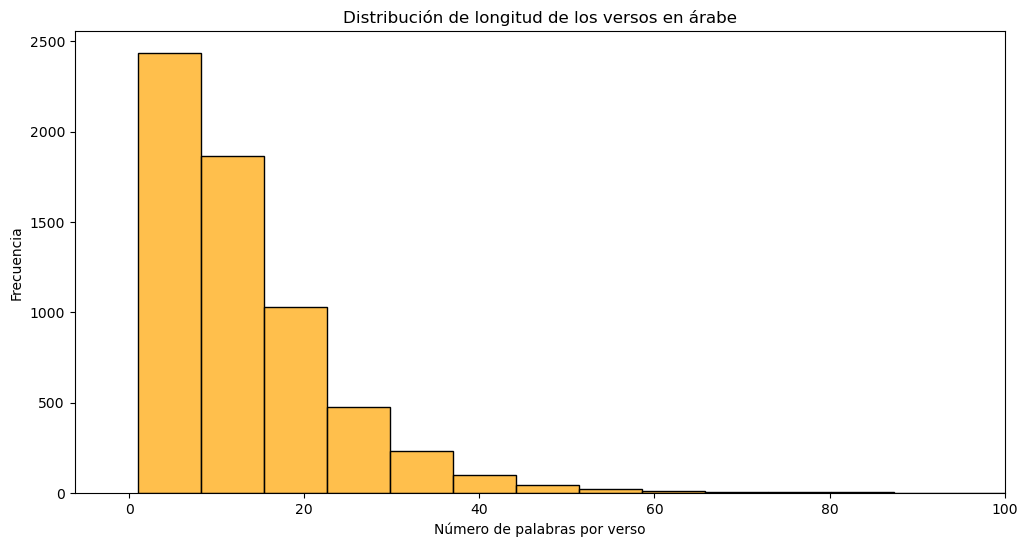

In [78]:
plt.figure(figsize=(12,6))
sns.histplot(ar_q["Número de palabras del verso"], bins=20, color="orange", alpha=.7)
plt.xlim(right=100)
plt.xlabel("Número de palabras por verso")
plt.ylabel("Frecuencia")
plt.title("Distribución de longitud de los versos en árabe")
plt.show()

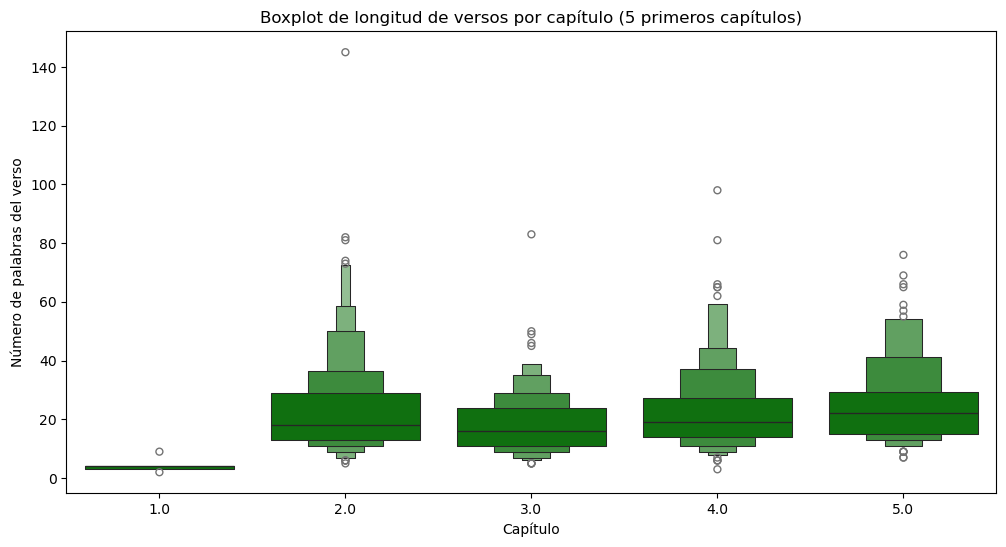

In [79]:
plt.figure(figsize=(12,6))
sns.boxenplot(x="Capítulo", y="Número de palabras del verso", data=ar_q[ar_q["Capítulo"] <= 5], color="green")
plt.title("Boxplot de longitud de versos por capítulo (5 primeros capítulos)")
plt.show()

Vamos a jugar un poco con camel_tools a ver que nos ofrece (https://camel-tools.readthedocs.io/en/latest/index.html)

In [ ]:
from camel_tools.disambig.bert import BERTUnfactoredDisambiguator
from camel_tools.tagger.default import DefaultTagger
from camel_tools.tokenizers.word import simple_word_tokenize

In [107]:
texto = ar_q["Texto"].tolist()
tokens = []
for sentence in texto:
    tokens.extend(simple_word_tokenize(sentence))

In [108]:
print(tokens)

['بسم', 'الله', 'الرحمن', 'الرحيم', 'الحمد', 'لله', 'رب', 'العالمين', 'الرحمن', 'الرحيم', 'مالك', 'يوم', 'الدين', 'اياك', 'نعبد', 'واياك', 'نستعين', 'اهدنا', 'الصراط', 'المستقيم', 'صراط', 'الذين', 'انعمت', 'عليهم', 'غير', 'المغضوب', 'عليهم', 'ولا', 'الضالين', 'بسم', 'الله', 'الرحمن', 'الرحيم', 'الم', 'ذلك', 'الكتاب', 'لا', 'ريب', 'ۛ', 'فيه', 'ۛ', 'هدي', 'للمتقين', 'الذين', 'يؤمنون', 'بالغيب', 'ويقيمون', 'الصلاه', 'ومما', 'رزقناهم', 'ينفقون', 'والذين', 'يؤمنون', 'بما', 'انزل', 'اليك', 'وما', 'انزل', 'من', 'قبلك', 'وبالاخره', 'هم', 'يوقنون', 'اولئك', 'علي', 'هدي', 'من', 'ربهم', 'ۖ', 'واولئك', 'هم', 'المفلحون', 'ان', 'الذين', 'كفروا', 'سواء', 'عليهم', 'اانذرتهم', 'ام', 'لم', 'تنذرهم', 'لا', 'يؤمنون', 'ختم', 'الله', 'علي', 'قلوبهم', 'وعلي', 'سمعهم', 'ۖ', 'وعلي', 'ابصارهم', 'غشاوه', 'ۖ', 'ولهم', 'عذاب', 'عظيم', 'ومن', 'الناس', 'من', 'يقول', 'امنا', 'بالله', 'وباليوم', 'الاخر', 'وما', 'هم', 'بمؤمنين', 'يخادعون', 'الله', 'والذين', 'امنوا', 'وما', 'يخدعون', 'الا', 'انفسهم', 'وما', 'يشعرون', 'ف

Analyzer (ya implicito) + BERT disambiguator

In [ ]:
#instalamos los modelos necesarios
!camel_data --install morphology-db-msa-r13
!camel_data --install disambig-mle-calima-msa-r13

No new packages will be installed.
No new packages will be installed.


In [95]:
disambig = BERTUnfactoredDisambiguator.pretrained(model_name='msa')

Some weights of the model checkpoint at C:\Users\diego\AppData\Roaming\camel_tools\data\disambig_bert_unfactored\msa were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


POS tagger

In [109]:
pos_tagger = DefaultTagger(disambig, feature='pos')
pos_tags = pos_tagger.tag(tokens)

Aqui lo que hacemos es etiquetar gramaticalmente las palabras del coran

In [ ]:
from collections import Counter
conteo = Counter(pos_tags)
print(conteo.most_common(10))

[('noun', 3392), ('verb', 2625), ('prep', 1421), ('noun_prop', 1129), ('foreign', 788), ('pron_rel', 600), ('part_neg', 457), ('conj_sub', 454), ('adj', 427), ('conj', 252)]


C:\Users\diego\AppData\Local\Temp\ipykernel_18048\3458263074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(etiquetas), y=list(frecuencias), palette="viridis")


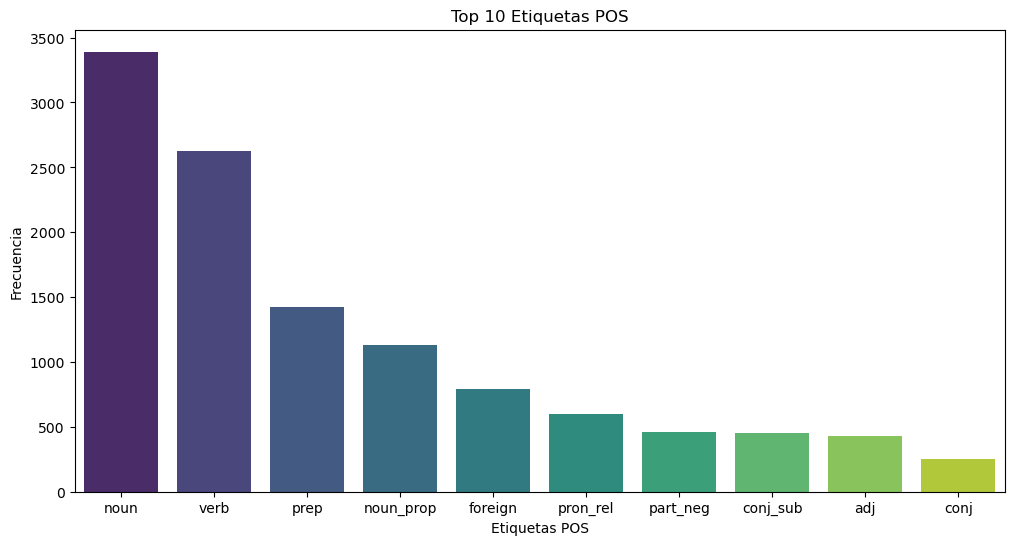

In [123]:
#Ploteamos las 10 etiquetas más comunes
plt.figure(figsize=(12,6))
etiquetas = [x[0] for x in conteo.most_common(10)]
frecuencias = [x[1] for x in conteo.most_common(10)]
sns.barplot(x=list(etiquetas), y=list(frecuencias), palette="viridis")
plt.xlabel("Etiquetas POS")
plt.ylabel("Frecuencia")
plt.title("Top 10 Etiquetas POS")
plt.show()

Para obtener la traducción instantánea de las 20 palabras más frecuentes, trabajaremos directamente con el Corán en inglés.

[nltk_data] Downloading package stopwords to /home/unai-olaizola-
[nltk_data]     osa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


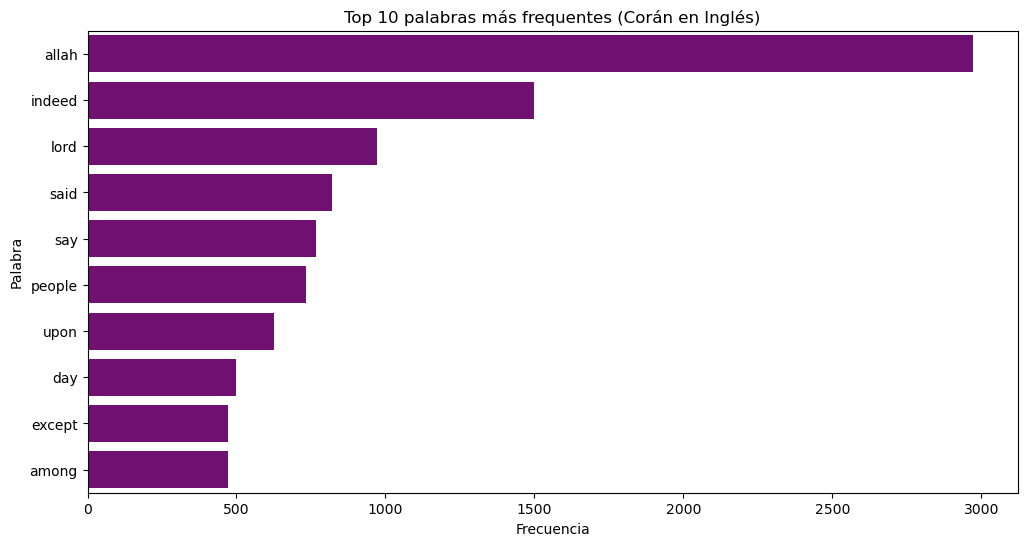

In [54]:
eng_q = pd.read_csv('/home/unai-olaizola-osa/Documents/NLP-Group-Project/NLP-Group-Project/data/raw_data/english_quran.txt', 
                    sep="|", 
                    names=["Capítulo", "Verso", "Texto"],
                    engine="python",
                    quoting=3, # Necesario para evitar problemas con las comillas en el texto en inglés.
                    header=None)
eng_q["Capítulo"] = pd.to_numeric(eng_q["Capítulo"], errors="coerce")
eng_q.head()

palabras = " ".join(eng_q["Texto"].dropna()).split()

# Para una representación más filedigna, vamos a obviar los stopwords
nltk.download("stopwords")
stopwords_eng = set(stopwords.words("english"))

palabras_sin_sw = [
    p.lower().strip(string.punctuation)  # quita comas, puntos, ... 
    for p in eng_q["Texto"].dropna().str.split().sum()
    if p.lower().strip(string.punctuation) not in stopwords_eng and p.lower().strip(string.punctuation) != ""
]
frequencia_palabra = Counter(palabras_sin_sw)

top10 = frequencia_palabra.most_common(10)

palabras, frequencias = zip(*top10)

plt.figure(figsize=(12,6))
sns.barplot(x=list(frequencias), y=list(palabras), color="purple")
plt.title("Top 10 palabras más frequentes (Corán en Inglés)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()